# The Sparks Foundation - Data Science & Business Analytics Internship
## TASK 2 - Prediction using Unsupervised Machine Learning
## Author - Sanskar Mundra
Batch - November 2021

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
#importing Kmean algorithem
from sklearn.cluster import KMeans

# To ignore the warnings if any in program
import warnings as wg
wg.filterwarnings("ignore")

In [4]:
#reading dataset which is downloaded from spark foundation link.
df=pd.read_csv("C:\Task 2\Iris.csv")

In [5]:
#exploring the data 
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Visuallization Of Data

In [7]:
df.shape

(150, 6)

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Finding the optimum number of clusters in dataset
As it is unsupervise learning so we will drop Label (species) column from dataset

In [11]:
iris = pd.DataFrame(df)
# here we are droping two columns names Species and Id 
iris_dataframe = iris.drop(columns= ['Species' ,'Id'] )
print(iris_dataframe.head())
print(iris_dataframe.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8


## To find optimum number of cluster we have to use elbow method
## In elbow method, the number of clusters are varied within a certain range of value. 
## For each value, within-cluster sum of square value is calculated and stored in some list.
## These value are then plotted against the range of number of clusters used before. 
## The location of bend in the graph indicates the appropiate number of clusters.

In [12]:
# Calculating the within-cluster sum of square
#creating an arrary of withing_cluster_sum_of_square
within_cluster_sum_of_square = []

clusters_range = range(1,8)
#here including 1(lower limit ) excluding 8(upper limit)
#here we are using k mean clusering. In k mean clustering algorithem find k number of centroid (minimum as possible)
#and then plot set of data around them as nearrest as possible by using sum of square method

for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_dataframe)
    within_cluster_sum_of_square.append(km.inertia_)

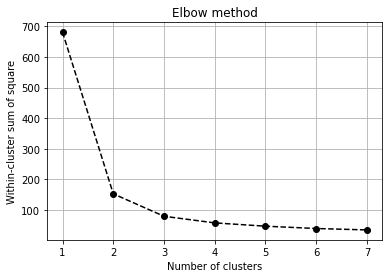

In [13]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='black')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

In [14]:
# As we see at number of cluster 3 after that with_in_sumof_square is not decreasing as rapidly as before 3 
# so from this we identify that there is 3 number of optiman cluster 

## Applying Kmean clustering on data

In [15]:
#here we are importing KMean clustering 
#doing 500 number if iteration aand taking number of cluster is 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_dataframe)

## Visualization of the clusters

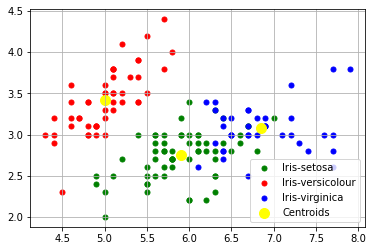

In [16]:
#here in x selecting all the rows and column number 1,2,3,4 from iris_df 
x = iris_dataframe.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'green', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'blue', label = 'Iris-virginica')

# Plotting the cluster centers
#this give us center or centroid of cluastering
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

# Conclusion : So we have successfully predicted the optimum vumber of clusters and represnted it visually